In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:

df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
# Checking the number of rows and columns

df.shape

(10127, 23)

In [4]:
# Dropping the last two columns and the client number column

df = df.iloc[:,1:-2]

In [5]:
# Checking for the number of null values present in each feature

round((df.isnull().sum() * 100)/(df.shape[0]),2)

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [6]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
# Changing the Attrition_Flag to 0 and 1 (Hidden Input/Output)

df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

# Exploratory Data Analysis

### Exploring Categorical Features

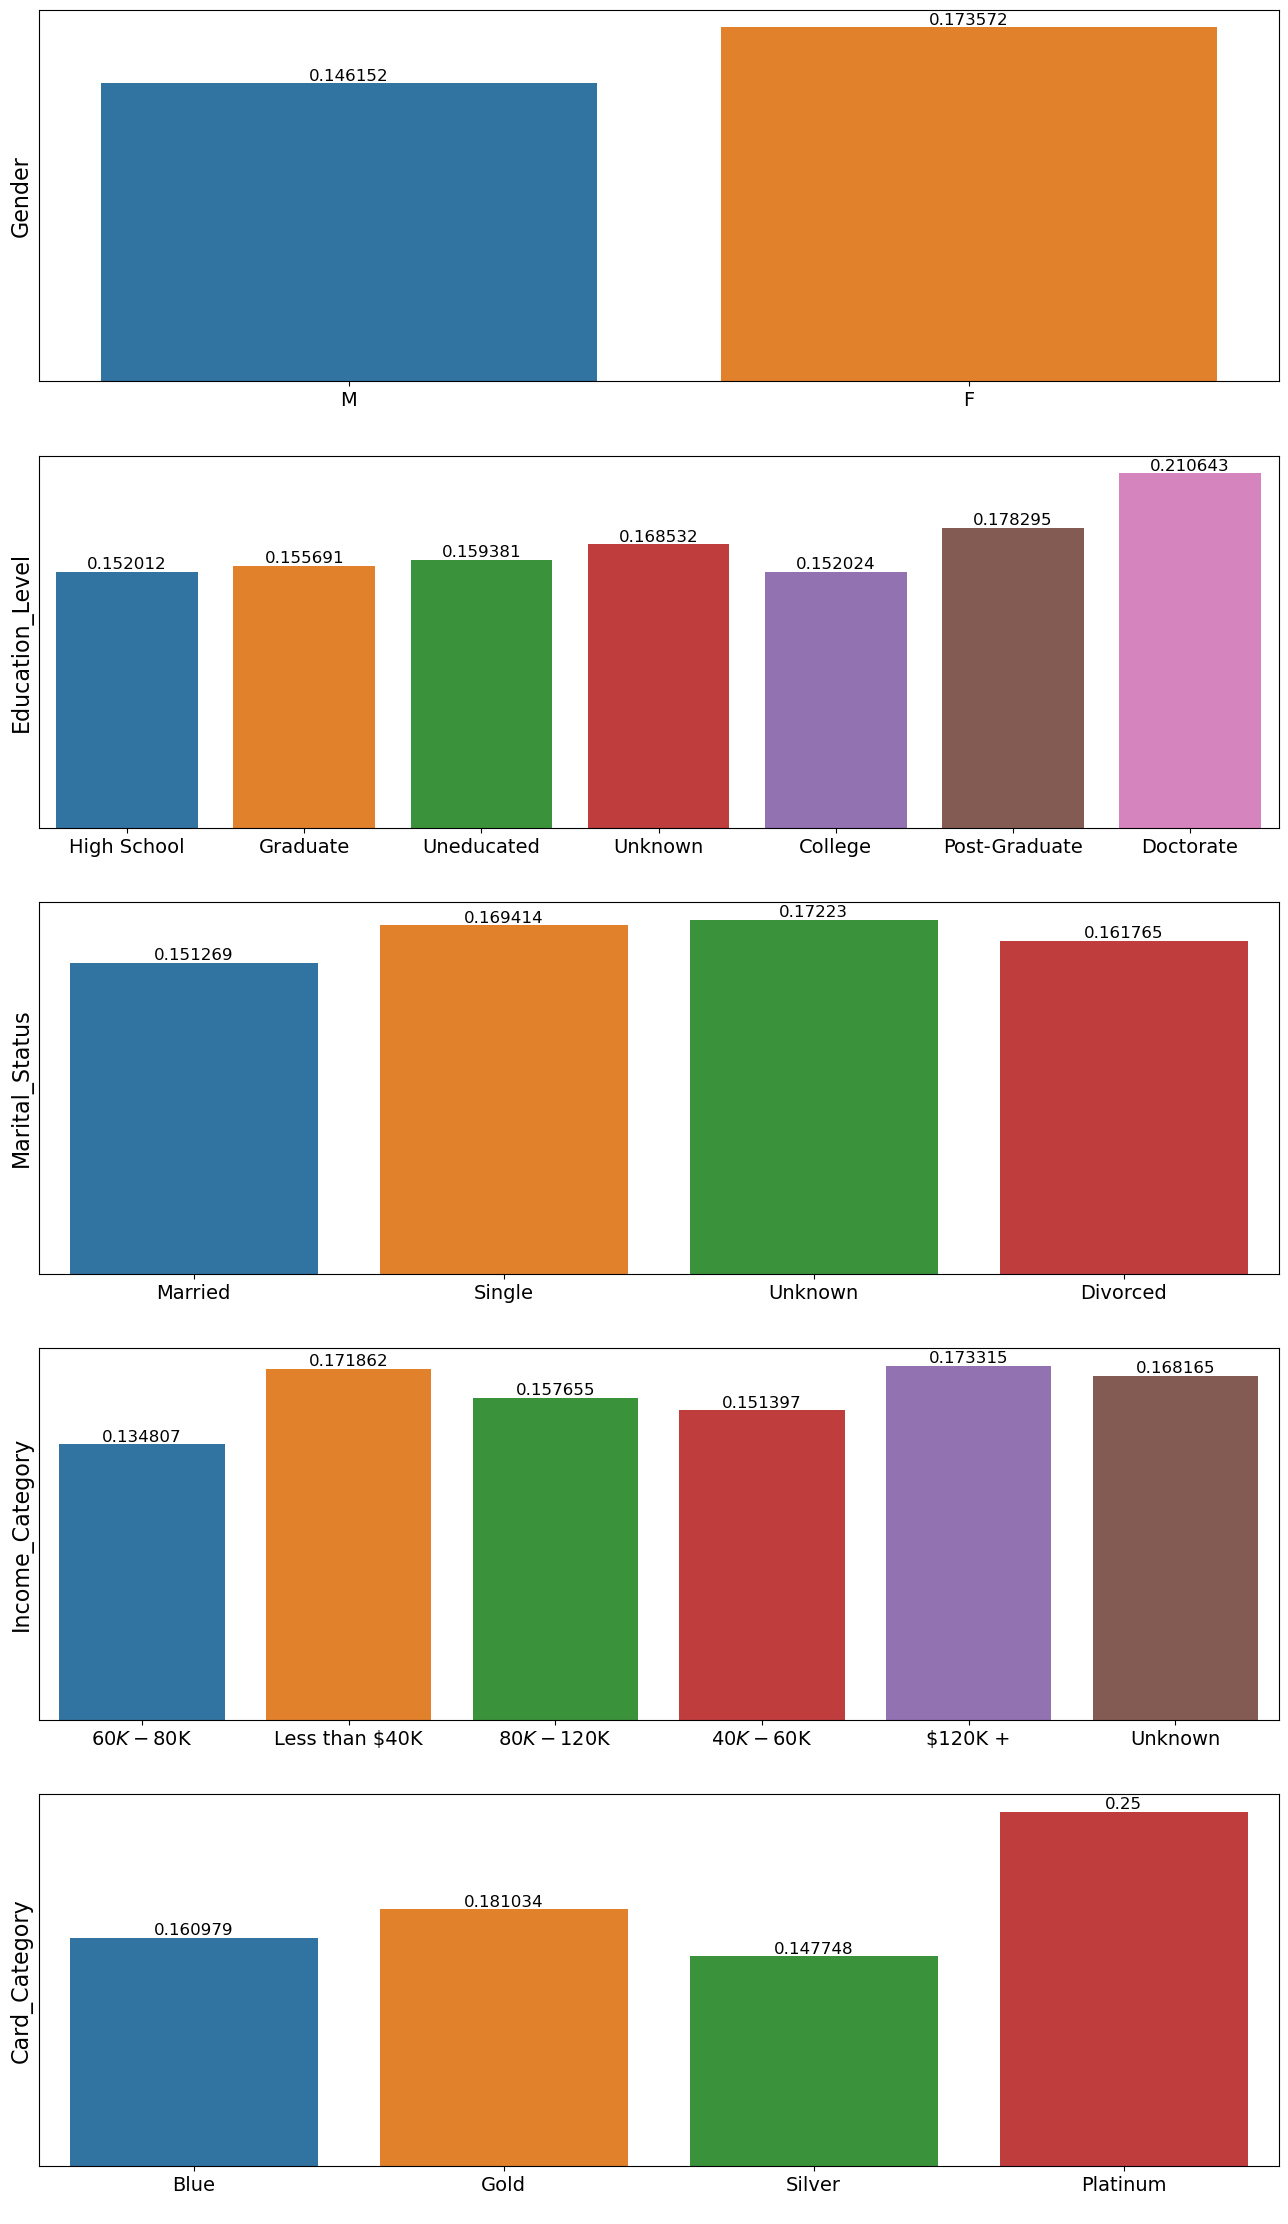

In [9]:
# Performing EDA on the Categorical columns (Hidden Input)

num_cols = list(df.select_dtypes(["int64","float64"]))
cat_cols = list(df.select_dtypes("object"))

fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(16, 28))
                
i = 0 #counter

for cols in cat_cols:
    
    sns.barplot(x=df[cols], y=df['Attrition_Flag'], fill=True, alpha=1, ci=None, ax=ax[i])
                
    ax[i].set_xlabel(' ')
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].set_ylabel(cols, fontsize=16)    
    ax[i].bar_label(ax[i].containers[0], size="12")
    ax[i].grid(False)
    i=i+1
    
      
plt.show()

### Exploring Numerical Features

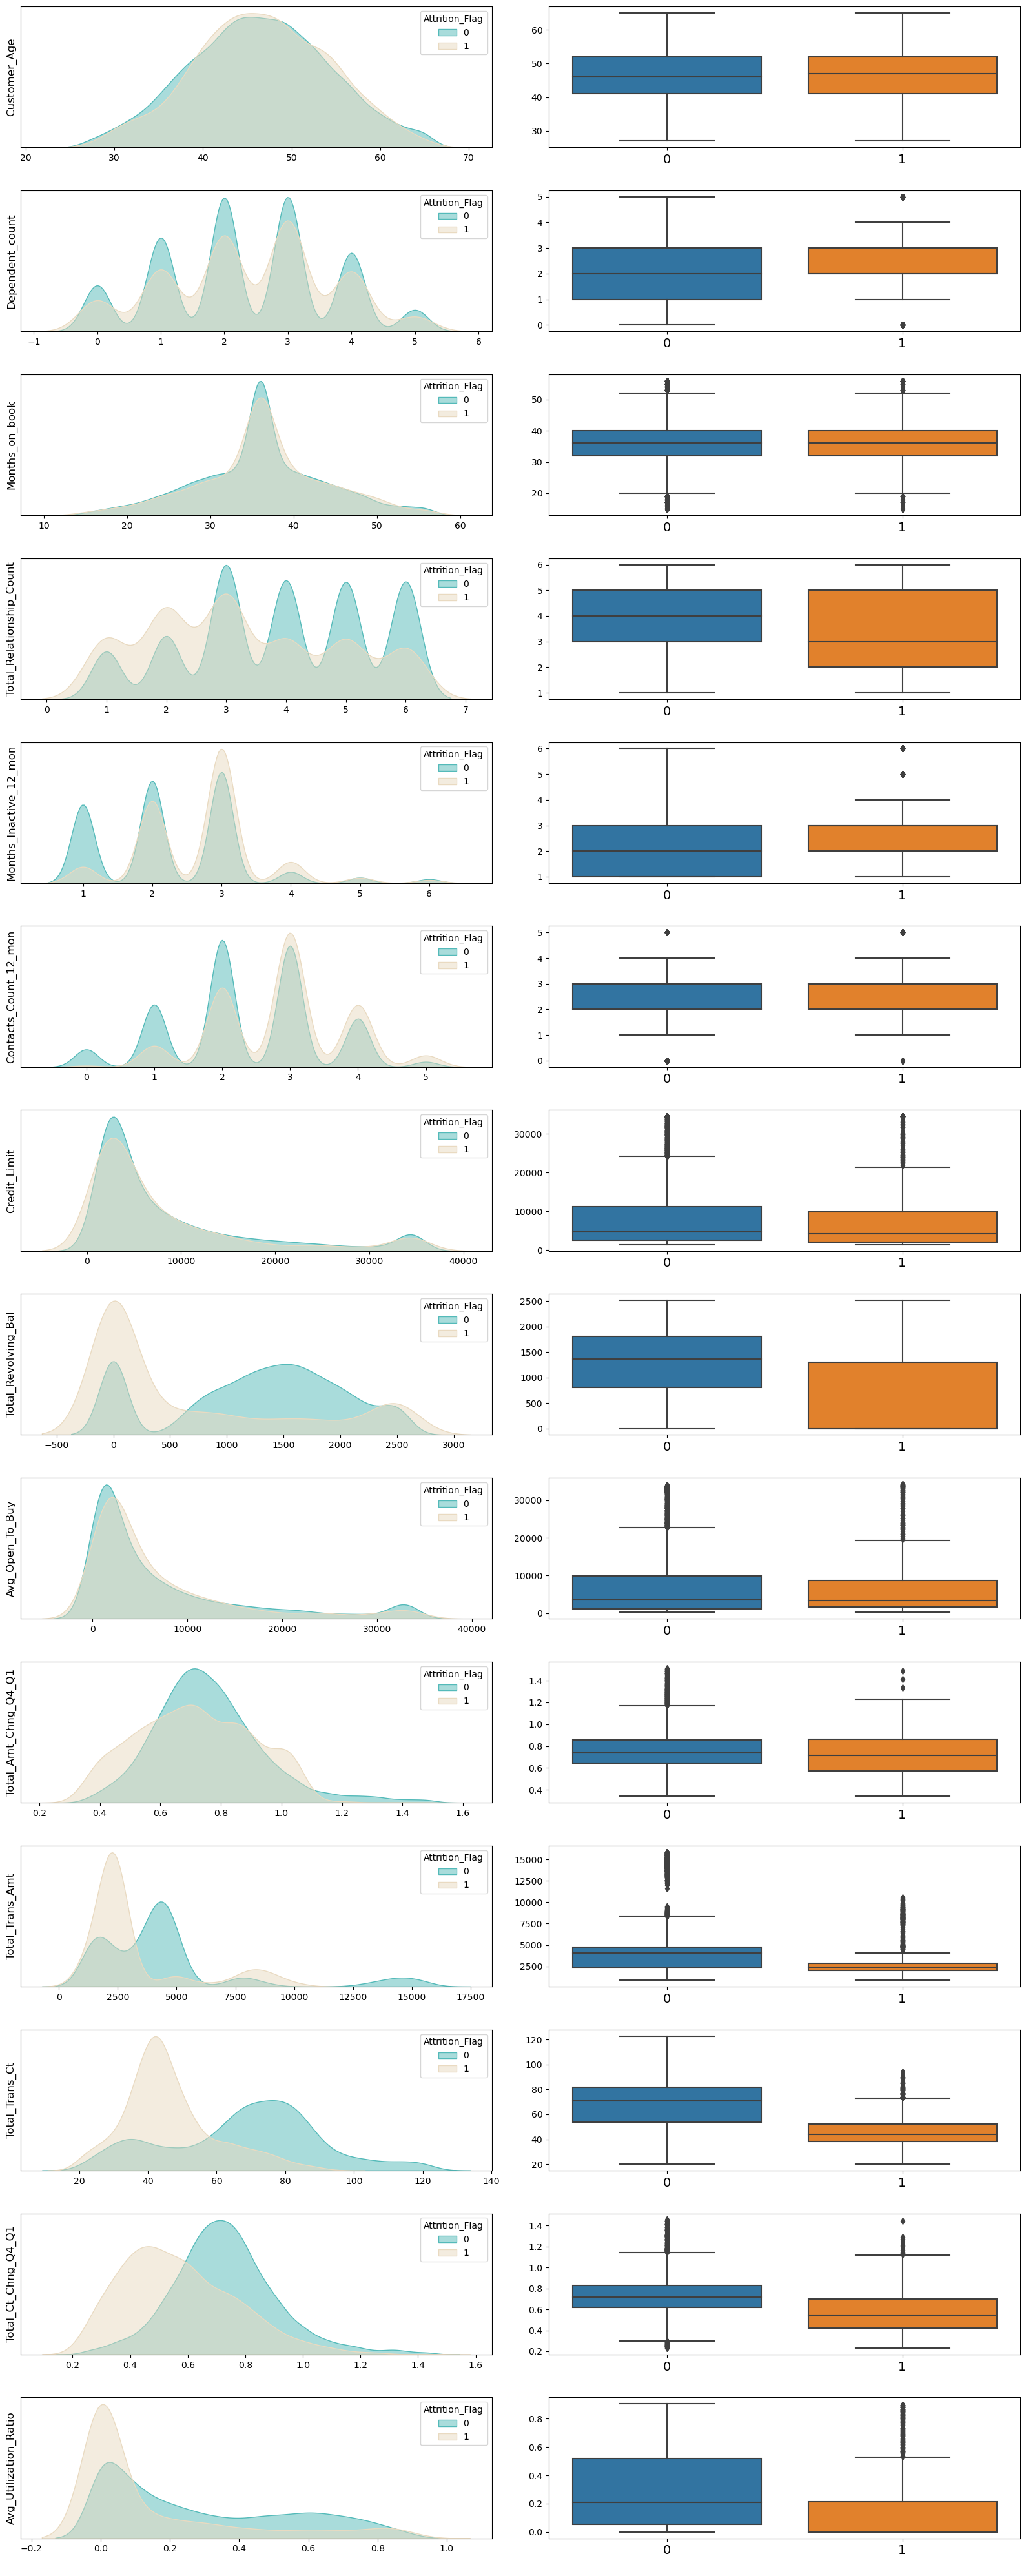

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, nrows=14, figsize=(16, 40))
i = 0  # Counter

for col in num_cols[1:]:
    # Removing Outliers
    Q3 = df[col].quantile(0.99)
    df_filtered = df[df[col] <= Q3]
    Q1 = df[col].quantile(0.01)
    df_filtered = df_filtered[df_filtered[col] >= Q1]

    for attrition_flag, color in zip(df_filtered['Attrition_Flag'].unique(), ['#54BAB9', '#E9DAC1']):
        sns.kdeplot(data=df_filtered[df_filtered['Attrition_Flag'] == attrition_flag], x=col, fill=True,
                    alpha=0.5, ax=ax[i, 0], color=color, label=attrition_flag)

    sns.boxplot(data=df_filtered, y=col, x='Attrition_Flag', ax=ax[i, 1])
    ax[i, 0].set_xlabel(' ')
    ax[i, 1].set_xlabel(' ')
    ax[i, 1].set_ylabel(' ')
    ax[i, 1].xaxis.set_tick_params(labelsize=14)
    ax[i, 0].tick_params(left=False, labelleft=False)
    ax[i, 0].set_ylabel(col, fontsize=12)
    ax[i, 0].legend(title='Attrition_Flag', loc='upper right')
    i += 1

plt.tight_layout()
plt.show()


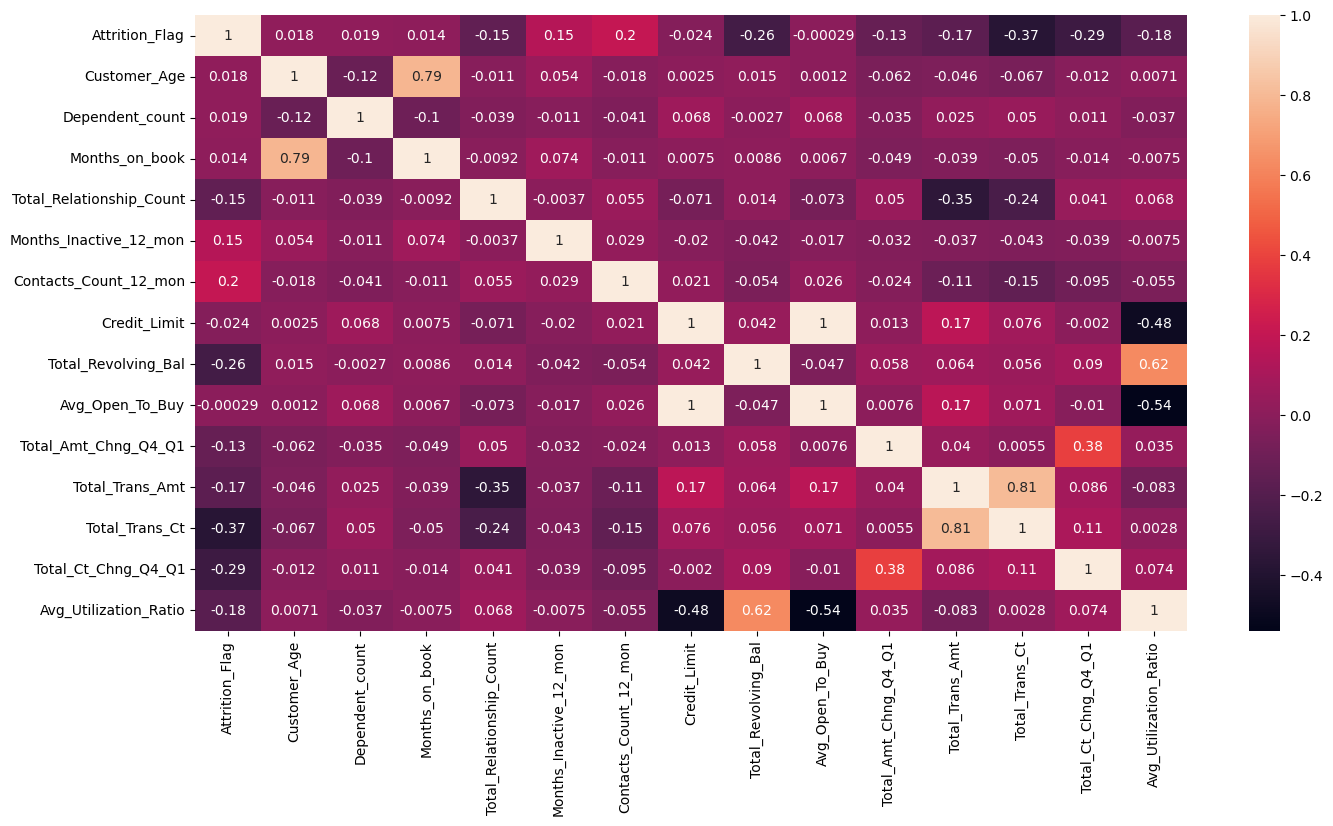

In [11]:
# Creating a heatmap of the numerical column (Hidden Input)

heat = df.corr()
plt.figure(figsize=[16,8])
sns.heatmap(heat,  annot=True)
plt.show()

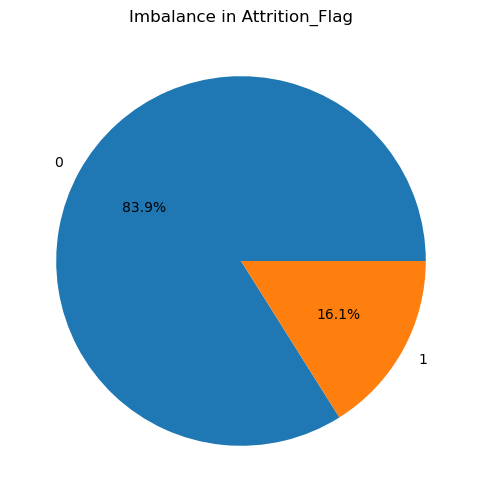

In [12]:
import matplotlib.pyplot as plt

# Checking the imbalance in the target variable: Attrition_Flag
value_counts = df["Attrition_Flag"].value_counts()
labels = value_counts.index
counts = value_counts.values

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e'])
plt.title('Imbalance in Attrition_Flag')
plt.show()


### Data Preprocessing

In [13]:
# Creating the dummy variables for all the categorical features

for col in cat_cols:
    dummy_cols = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = pd.concat([df,dummy_cols],axis=1)
    df.drop(columns=col, inplace=True)

In [14]:
# Splitting the data into train and test

y = df.pop("Attrition_Flag")
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)

In [15]:
# Normalizing the data
req_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train[req_cols])

X_test = scaler.transform(X_test[req_cols])

In [16]:
# Applying SMOTE to handle imbalance in target variable

sm = SMOTE(random_state = 69, sampling_strategy = 1.0)

X_train, y_train = sm.fit_resample(X_train, y_train)

### Model Devolepment

In [17]:
# XGBoost model

xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=69, ...)

In [18]:
# XGBoost Score on the test data

xgb_model.score(X_test, y_test)

0.9654491609081934

In [19]:
# Checking the Classification Report (Hidden Input)

print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1708
           1       0.88      0.90      0.89       318

    accuracy                           0.97      2026
   macro avg       0.93      0.94      0.94      2026
weighted avg       0.97      0.97      0.97      2026



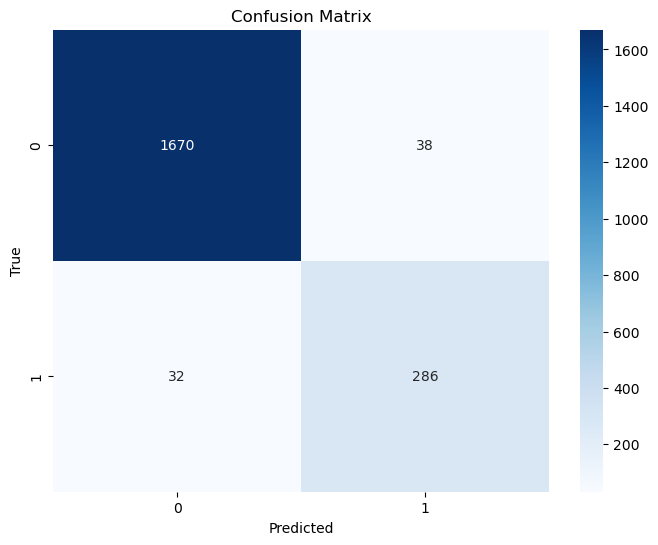

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Creating the Confusion Matrix
cfm = confusion_matrix(y_true=y_test, y_pred=xgb_model.predict(X_test))

# Get the class labels
labels = np.unique(y_test)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


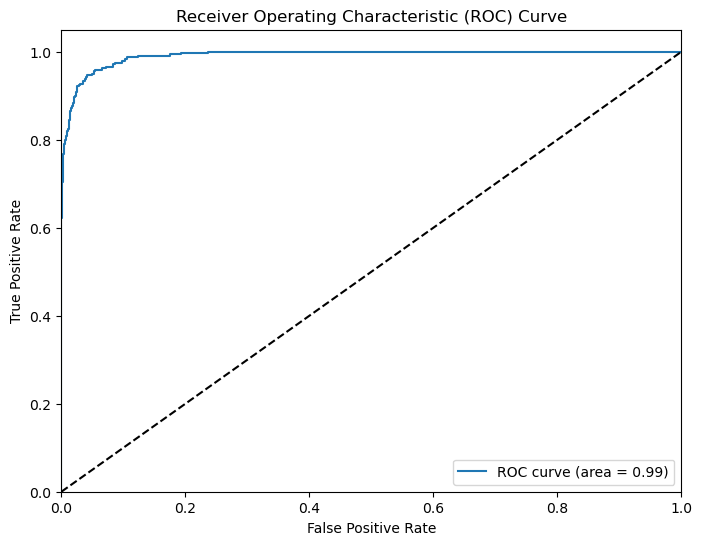

In [26]:

from sklearn.metrics import roc_curve, roc_auc_score

y_true = y_test # ground truth labels
y_probas = xgb_model.predict_proba(X_test) # predicted probabilities generated by sklearn classifier

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_probas[:, 1])

# Calculate the AUC score
auc = roc_auc_score(y_true, y_probas[:, 1])

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Feature Importance

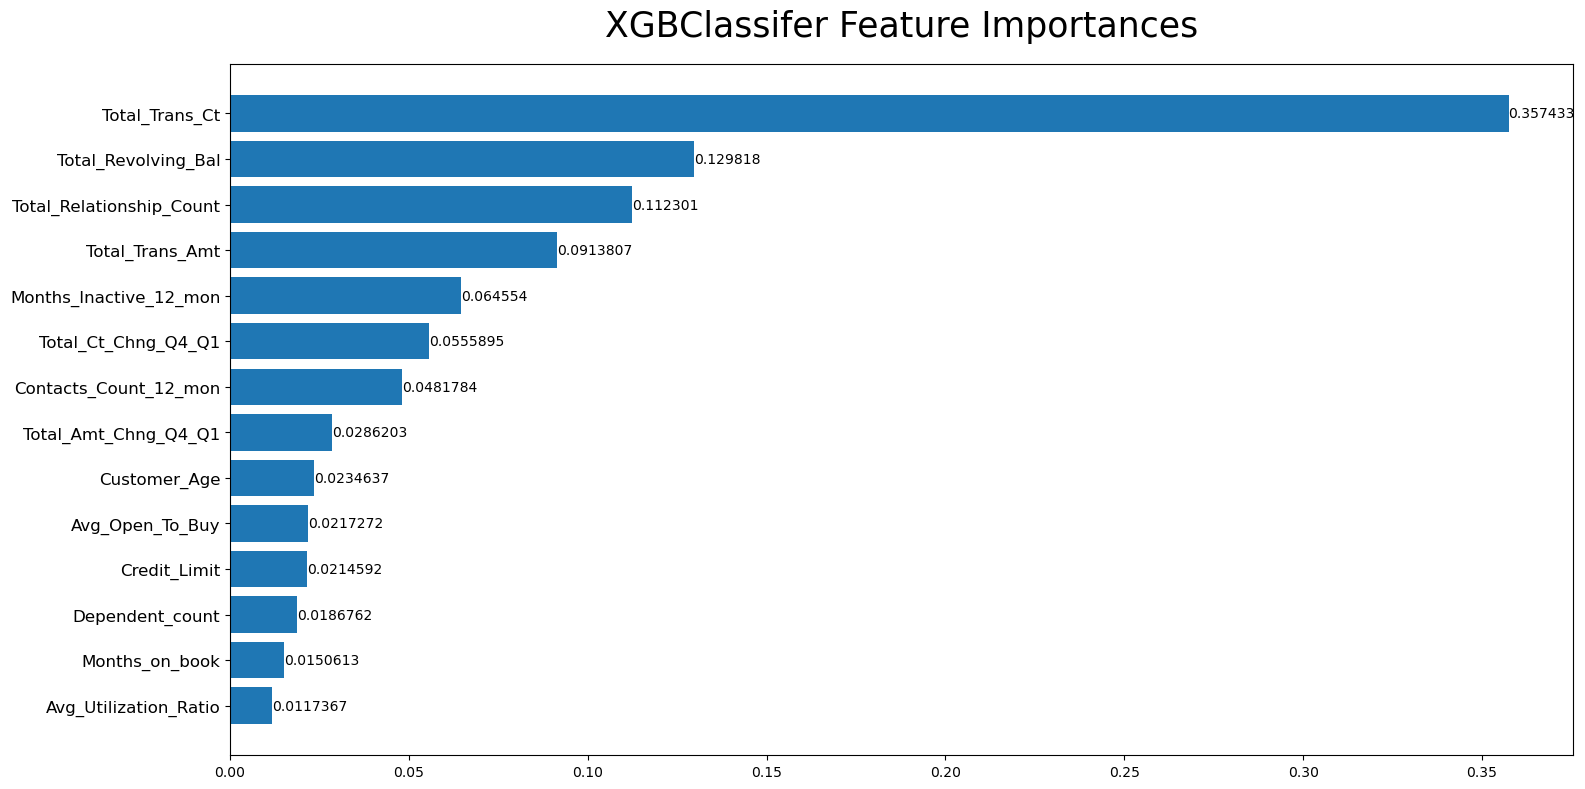

In [27]:
# Plotting the important features (Hidden Input)

features_to_plot = 14

importances = xgb_model.feature_importances_
indices = np.argsort(importances)

best_vars = np.array(req_cols)[indices][-features_to_plot:]
values = importances[indices][-features_to_plot:]
best_vars

y_ticks = np.arange(0, features_to_plot)
fig, ax = plt.subplots(figsize=(16,8))
ax.barh(y_ticks, values)
ax.set_yticklabels(best_vars, size=12)
ax.set_yticks(y_ticks)
ax.set_title("XGBClassifer Feature Importances", size=25, pad=20, color='black')
ax.bar_label(ax.containers[0], size="10")
fig.tight_layout()
plt.grid(False)
plt.show()